### Midterm Project

**HeonYeong(Andy) Lee**

**Professor Jacob Koehler**

**Data Bootcamp ECON-UB 232**

**October 31, 2023**

For my midterm project, I will be using the "Student Stress Factors: A Comprehensive Analysis" dataset from kaggle.com
The link to the dataset: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

The main reason why I picked this dataset is because I want to use this opportunity to better understand how some factors that impact students' stress levels are related to one another, especially because I am a student myself. The other reason why I thought that this dataset would be an ideal dataset to use for the midterm is because of its categorization of various sub-factors. The 5 main categories that the author of this dataset used are psychological factors, physiological factors, social factors, environmental factors, and academic factors.

Below, I will be answering descriptive statistics questions first and move on to drawing plots to answer the question of how some factors that impact students' stress levels are linked to one another.

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Step 1**: Loading the data file.

Below, I am loading in the data from the `StressLevelDataset.csv` file and assigning it to the variable `stressleveldataset` below.  

In [147]:
stressleveldataset = pd.read_csv('data/StressLevelDataset.csv')

In [148]:
stressleveldataset.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


Let's see some basic information about `stressleveldataset` by using `.info()` method.  

In [149]:
stressleveldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

By using `.info()` method on `stressleveldataset`, we are given the number of columns which is 21 and the number of rows which is 1100. 

**BUT!** before we proceed, let's check if this dataset requires cleaning by checking for duplicates and missing values.

In [150]:
# If 0, then no duplicates.
stressleveldataset.duplicated().sum()

0

In [151]:
# If all 0, then no missing values.
stressleveldataset.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Since we have confirmed that this dataset requires no cleaning, we can start answering the questions.

#### _Descriptive Statistic Questions:_

**Question 1**: Find out the number of students being studied. 

In [152]:
num_of_students = len(stressleveldataset)
print("The total number of students studied in this dataset are:") 
print(num_of_students)

The total number of students studied in this dataset are:
1100


**Question 2**: Find out the average anxiety level of the students studied.

In [153]:
avg_anxiety = stressleveldataset["anxiety_level"].mean()
print("The average anxiety level of students studied in this dataset are:") 
print(avg_anxiety)

The average anxiety level of students studied in this dataset are:
11.063636363636364


**Question 3**: Find out the number of students who have reported a history of mental health issues.

In [154]:
num_of_mhi = len(stressleveldataset[stressleveldataset["mental_health_history"] == 1])
print("The total number of students who have reported a history of mental health issues are:") 
print(num_of_mhi)

The total number of students who have reported a history of mental health issues are:
542


**Question 4**: Find out the number of students who have a self-esteem level below the average.

In [155]:
# filtering the dataset for students with a self_esteem value less than the average self-esteem level of the dataset
se_avg = stressleveldataset["self_esteem"].mean()
se_below_avg = stressleveldataset[stressleveldataset["self_esteem"] < se_avg]
# stressleveldataset['self_esteem'].mean()] is equal to the average self-esteem level
print("The number of students who have a self-esteem level below the average in this dataset are:") 
# use len() to get the number of the students
print(len(se_below_avg))

The number of students who have a self-esteem level below the average in this dataset are:
507


**Question 5**: Find out the percentage of students who have reported experiencing depression.

In [156]:
pct_of_dep = len(stressleveldataset[stressleveldataset["depression"] > 0])
total_students = len(stressleveldataset)
percentage_of_dep = (pct_of_dep / total_students) * 100
print("The percentage of students who have reported experiencing depression is:") 
print(percentage_of_dep)

The percentage of students who have reported experiencing depression is:
96.0


#### _Plotting Questions:_

**Question 6**: Draw a histogram to visualize the distribution of headache frequency among students.

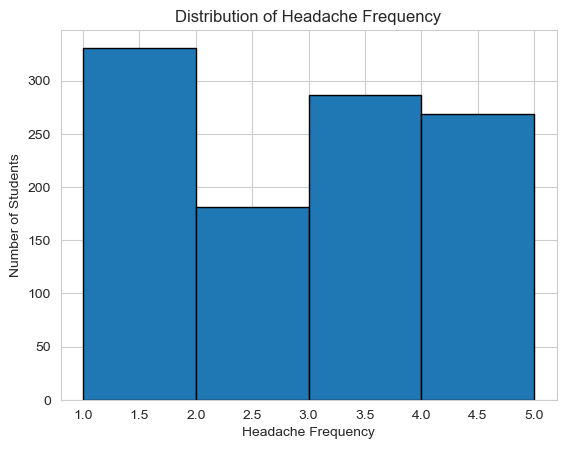

In [157]:
stressleveldataset["headache"].plot(kind = "hist", bins = range(1, stressleveldataset["headache"].max() + 1), edgecolor = "black")
plt.title("Distribution of Headache Frequency")
plt.xlabel("Headache Frequency")
plt.ylabel("Number of Students")
plt.show()

While this does answer the question, I felt like that the graph does not look visually appealing. The main thing I wanted to fix were the increments in the y-axis and add some grid lines in the plot for easier readability. Here is my updated answer:

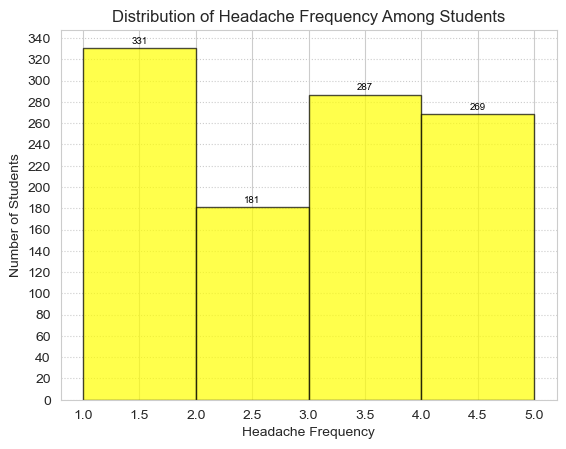

In [158]:
revised = stressleveldataset["headache"].plot(kind = "hist", bins=range(1, stressleveldataset["headache"].max() + 1), edgecolor = "black", color = "yellow", alpha = 0.7)

# Fixing the y-axis to be increments of 20
revised.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Grid lines for aesthetic purposes
revised.grid(axis = "y", linestyle = "dotted", alpha = 1)

plt.title("Distribution of Headache Frequency Among Students")
plt.xlabel("Headache Frequency")
plt.ylabel("Number of Students")

# What this for loop does is that it loops through each of the bars in the histogram and adds annotations to them including its positioning.
for bar in revised.patches:
    if bar.get_height() > 0:
        revised.annotate(
            # siwitching the height of the bar to an integer to get the number of students
            f"{int(bar.get_height())}", (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = "center", va = "center", fontsize = 7, color = "black", xytext = (0, 5), textcoords = "offset points"
        )

plt.show()

**Question 6 Analysis**:
From the histogram above, we can see that a lot of students actually do experience headaches frequently despite 331 students belonging in the first class. However, one thing we can say for sure is that headaches are pretty common amongst these students and that various factors influence this. The factors may include having a lack of sleep and having too much homework. To better understand this, let's take a look at the sleep quality of students in question 7.

**Question 7**: Draw a bar plot to show how many students rate their sleep quality (0 being very bad and 5 being very good).

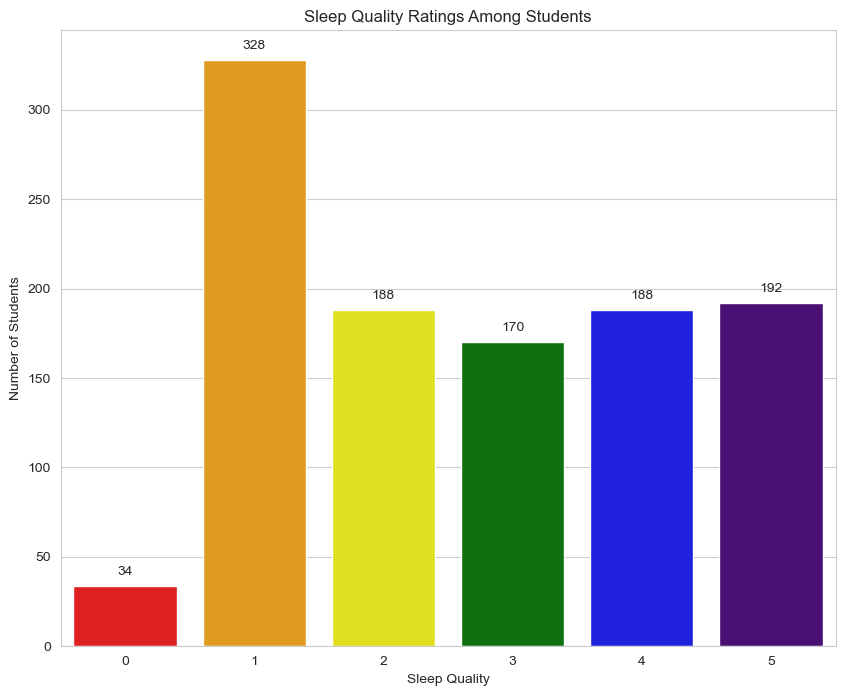

In [159]:
sns.set_style("whitegrid")

# Order of sleep quality score
order = [0, 1, 2, 3, 4, 5]

# Color palette for each score
palette = {0: "red", 1: "orange", 2: "yellow", 3: "green", 4: "blue", 5: "indigo"}

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = "sleep_quality", data = stressleveldataset, order = order, palette = palette)

# This for loop's purpose is to insert value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Sleep Quality Ratings Among Students')
plt.xlabel('Sleep Quality')
plt.ylabel('Number of Students')

plt.show()


**Question 7 Analysis**: From the bar plot above, we can immediately notice that a very poor sleep quality is not common amongst the students. However, if we take a look at "Sleep Quality 1", we can see that this sleep quality score is where most students scored which means that they have a poor sleep quality. This could be due to the noise levels in their dorms or having too much work. One interesting thing I found out is that there are actually a decent amount of students that have a pretty good sleep quality if we take a look at "Sleep Quality 4 and 5". Let's take a look at noise levels to see if students get significantly impacted by them as noise levels could be an influential factor in the students' sleep quality scores.

**Question 8**: Draw a horizontal bar chart to compare the number of students living in different noise level conditions.

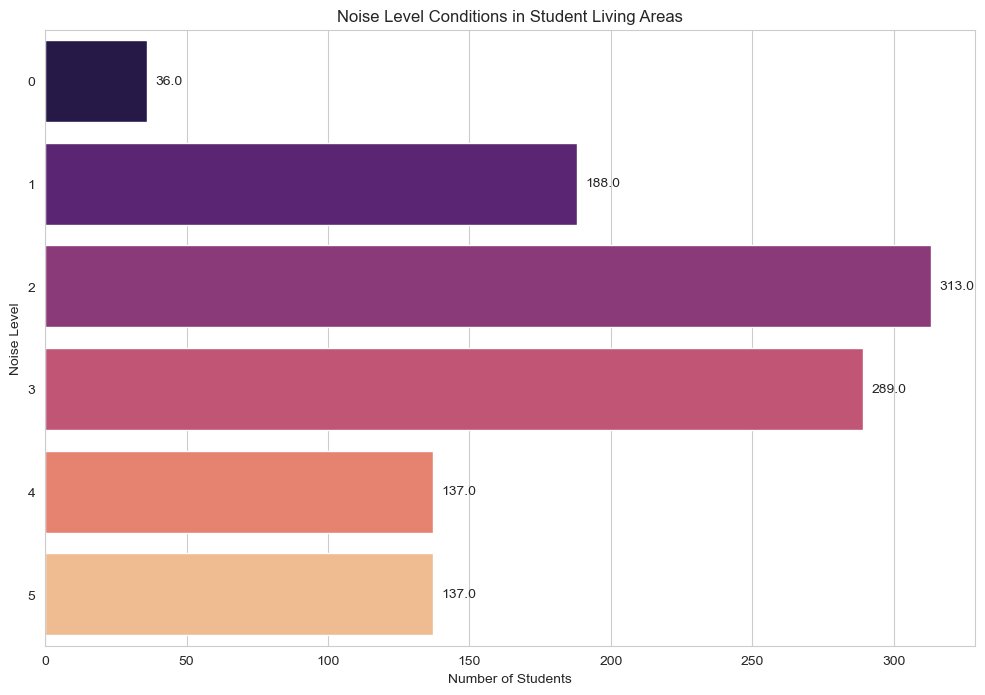

In [160]:
# Sorting the index for the correct order while also getting the counts for each noise level from the dataset
noise_level = stressleveldataset["noise_level"].value_counts().sort_index()

plt.figure(figsize = (12, 8))
ax = sns.barplot(y = noise_level.index, x = noise_level.values, palette = "magma", orient = "h"  #'h' for horizontal bar plot
)

# What this for loop essentially does is it adds value labels at the end of each bar
for i in ax.patches:
    width = i.get_width()
    plt.text(width + 3, i.get_y() + i.get_height() / 2, f"{width}", va = "center")

plt.title("Noise Level Conditions in Student Living Areas")
plt.xlabel("Number of Students")
plt.ylabel("Noise Level")

plt.show()

**Question 8 Analysis**: From the horizontal bar chart above, we can right away notice that the students are not living in dorms that are considered "quiet" as "Noise Levels 2 and 3" are notably longer than the rest and "Noise Levels 4 and 5" have a sum of 274 students. While there are a total of 224 students who say that their dorms are quiet by looking at "Noise Levels 0 and 1", there are still more students who believe that the noise levels in their living areas are somewhat moderate to exremely noisy. This is interesting so let's make a scatterplot and see if there is a correlation with the student's sleep quality and noise level in their living areas.

**Question 9**: Draw a scatterplot to show if there is a correlation with the student's sleep quality and noise level in their living areas.

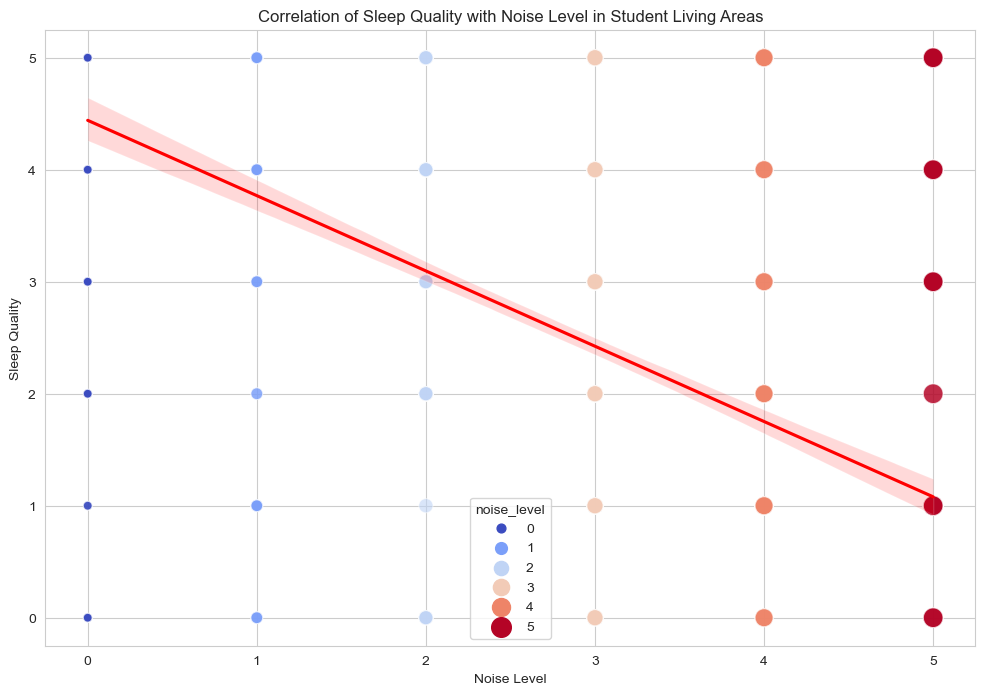

In [161]:
sns.set_style("whitegrid")

# Scatterplot which will show the relationship between sleep quality and noise level
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x = "noise_level", y = "sleep_quality", data = stressleveldataset, palette = "coolwarm",
    hue = "noise_level",  # Color will depend on the noise level
    size = "noise_level",  # Size of the plot will depend on the noise level
    sizes = (40, 200), alpha = 0.6)

# Regression line to check for correlation
sns.regplot(x = "noise_level", y = "sleep_quality", data = stressleveldataset, scatter = False, ax = ax, color = "red")

plt.title("Correlation of Sleep Quality with Noise Level in Student Living Areas")
plt.xlabel("Noise Level")
plt.ylabel("Sleep Quality")

plt.show()

**Question 9 Analysis**: While this scatterplot may not look like your conventional scatterplot due to the sleep quality score and the noise level score only ranging from 0 to 5, I made it easier to read the plot by making the points vary in size and color depending on the noise level. The regression line shows that there is a correlation between the sleep quality and noise level. As the noise level increases, the sleep quality worsens which answers our question of how one stress factor of a student is related to another stress factor. Let's now take a look and see if there is a relationship between history of mental illnesses and self-esteem to prove that there is a connection between these factors.

**Question 10**: Draw a boxplot to show the spread of self-esteem levels among the students with people who have a history of mental illness and those who don't.

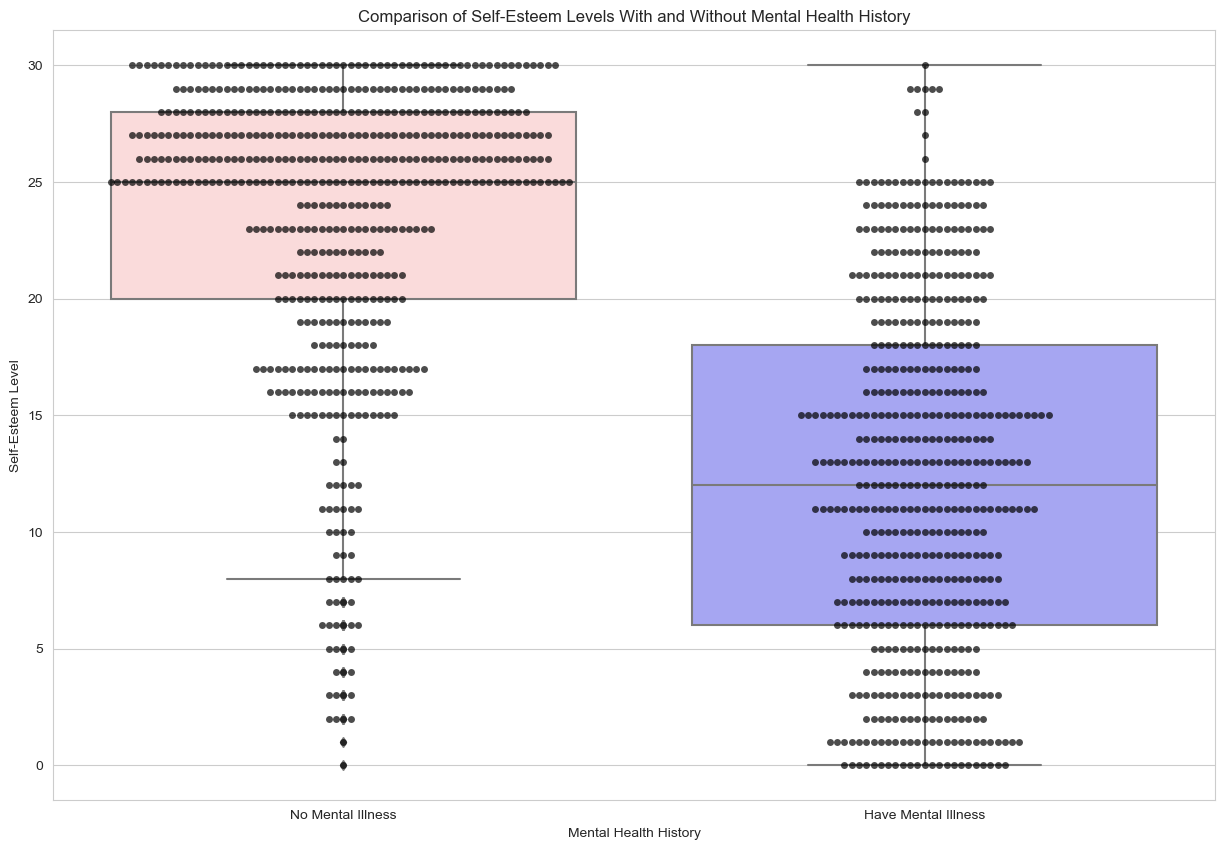

In [162]:
sns.set_style("whitegrid")

# Creating a separate column based on the students' mental health history
stressleveldataset["Mental Health History"] = stressleveldataset["mental_health_history"].apply(lambda x: "Have Mental Illness" if x == 1 else "No Mental Illness")

# Creating a boxplot
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x = "Mental Health History", y = "self_esteem", data = stressleveldataset, palette = ["#FFD6D6", "#9999FF"])

# To see where the exact points are located, I am using swarmplot to give the reader more info.
sns.swarmplot(x = "Mental Health History", y = "self_esteem", data = stressleveldataset, color = "black", alpha = 0.7)

plt.title("Comparison of Self-Esteem Levels With and Without Mental Health History")
plt.xlabel("Mental Health History")
plt.ylabel("Self-Esteem Level")

plt.show()

**Question 10 Analysis**:
From this plot, we can clearly identify that the students with no reported history of mental illnesses generally have higher self-esteem levels than the students who have history of mental illnesses. However, it is important to not make a generalization that students with mental illnesses have lower self-esteem levels than those who do not. The reason for this is different factors come into play such as bullying and academic performance. For example, a student with a history of mental illnesses could have been bullied at school which caused the student to have a low self-esteem. Because we explored the topic of self-esteem levels back in question 4, let's print out the average self-esteem level of these students and compare it to the plot.

In [163]:
print(se_avg)

17.777272727272727


**Question 10 Analysis Cont.**: Since we know that 17.78 is the approximate average self-esteem level of the students, we can see that the majority of the students who do not have a history of mental illnesses are actually above the average self-esteem level. On the other hand, the majority of the students with a history of mental illnesses are actually below the average self-esteem level. This shows how psychological factors of a student can affect how a student lives their life which in this case is self-esteem and history of mental illnesses. To dive even deeper and explore other various factors such as academic factors, let's take a look at how can the quality of a teacher-student relationship affect a student's academic performance.

**Question 11**:
Draw a violin plot to show how the quality of the teacher-student relationship can affect a student's academic performance.

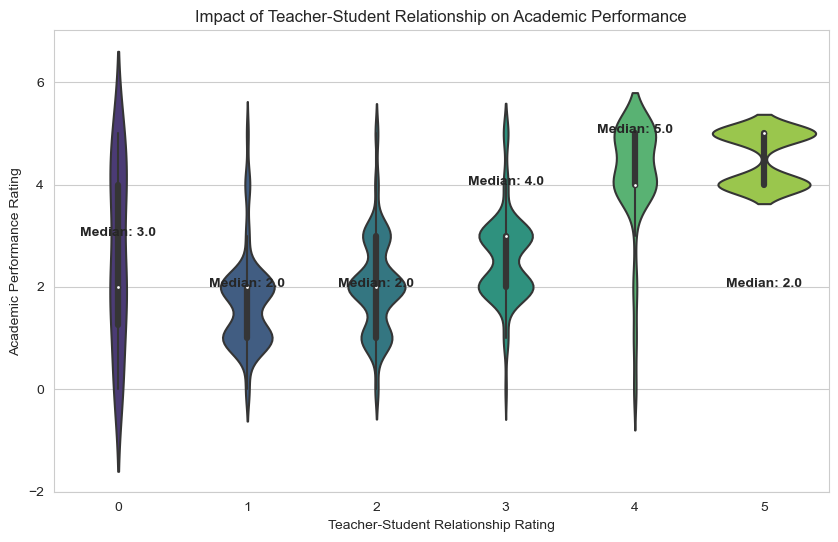

In [164]:
relationship_unique_values = stressleveldataset["teacher_student_relationship"].unique()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(x = "teacher_student_relationship", y = "academic_performance", data = stressleveldataset, palette = "viridis")

ax.set_title("Impact of Teacher-Student Relationship on Academic Performance")
ax.set_xlabel("Teacher-Student Relationship Rating")
ax.set_ylabel("Academic Performance Rating")

# Inserting the median values for each violin
for i in range(len(relationship_unique_values)):
    median_value = stressleveldataset[stressleveldataset["teacher_student_relationship"] == relationship_unique_values[i]]["academic_performance"].median()
    
    # Text annotation characteristics
    plt.text(i, median_value, f"Median: {median_value}", horizontalalignment = "center", weight='bold')
    
plt.show()

**Question 11 Analysis**:
From the violin plot above, we can see that the median values increase with the teacher-student relationship ratings. This means that we could infer a positive correlation. This is a crucial finding because self-esteem is one important factor that affects teacher-student relationship rating. This shows how a student's psychological factor can significantly affect a student's academic performance. Now, let's proceed to the last category which are the social factors.

**Question 12**:
Draw a strip plot to show if students who experience bullying are more likely to report higher anxiety levels.Are students who experience bullying more likely to report higher anxiety levels?

/var/folders/zg/fs_v5gl1033gxd7m4_8lrq540000gn/T/ipykernel_8630/627271161.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(x = "bullying", y = "anxiety_level", data = stressleveldataset, jitter = 0.25, palette = "tab10")


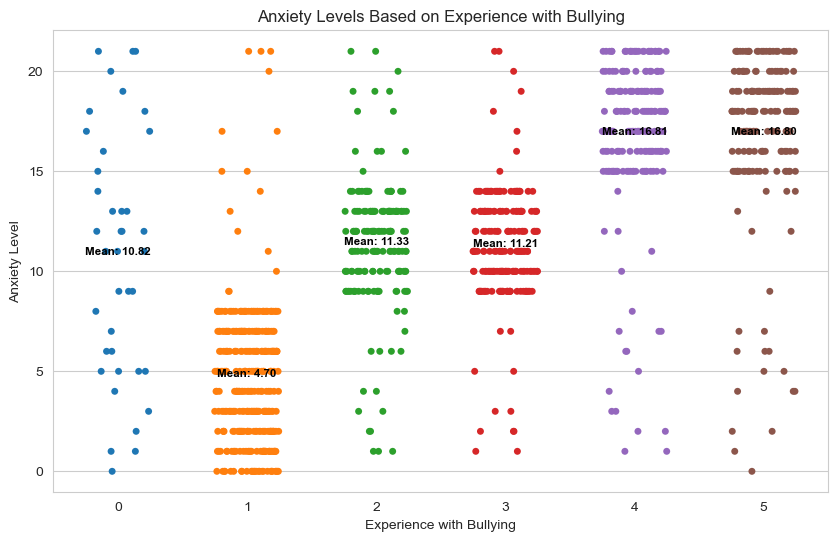

In [165]:
plt.figure(figsize = (10, 6))
ax = sns.stripplot(x = "bullying", y = "anxiety_level", data = stressleveldataset, jitter = 0.25, palette = "tab10")

means = stressleveldataset.groupby("bullying")["anxiety_level"].mean().reset_index()

# this for loop is for placing the mean values in the plot
for i in range(len(means)):
    ax.text(i, means["anxiety_level"][i], f"Mean: {means['anxiety_level'][i]:.2f}", horizontalalignment = "center", size = "small", color = "black", weight = "bold")

ax.set_title("Anxiety Levels Based on Experience with Bullying")
ax.set_xlabel("Experience with Bullying")
ax.set_ylabel("Anxiety Level")
              
plt.show()

**Question 12 Analysis**:
From the strip plot above, we can identify that the students who have experienced bullying more have higher anxiety levels than those who did not. The "4 and 5" strips of the "Experience with Bullying" are almost neck-to-neck on the average anxiety levels and the same applies to strips "2 and 3". This is a crucial finding as this serves as the last piece of information to answering our research question of whether all main stress factor categories are linked or not. Let's move on to the conclusion.

#### Conclusion
By exploring this specific dataset, I was able to gain various insights on the factors that affect student stress levels. My research covered a range of variables as I utilized factors from all the categories such as psychological, physiological, environmental, academic, and social. 

My major findings include:
Sleep quality is shown to be inversely correlated with noise levels in students' living areas which demonstrates that environmental factors play a significant role in student well-being. Moreover, students with a history of mental health issues tend to have lower self-esteem levels which emphasizes the psychological impacts on student stress. In addition, students who experience bullying can make a huge impact on their anxiety levels. As a result, this analysis shows how student stress can be caused from various factors and that there exists a connection between various factors by having a positive correlation. Therefore, it is important that we address these stress factors not indvidually but collectively to help reduce student stress overall. 